<a href="https://colab.research.google.com/github/HGOYALMQF27/Portfolio-Optimization/blob/main/Optimization1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 71.2 MB/s eta 0:00:00


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 KB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import plotly.express as px
from pandas_datareader import data
from pulp import *
from datetime import date
from dateutil.relativedelta import relativedelta
from pypfopt import expected_returns
from pypfopt import risk_models
from pypfopt import EfficientFrontier
from pypfopt import plotting
import copy

In [ ]:
tickers = ['AAPL', 'AXP', 'MSFT', 'DIS', 'KO', 'JPM', 'UNH', 'MRK', 'WMT', 'HD', 'V']

In [ ]:
start_date = '2018/01/01'
end_date = datetime.today().strftime('%Y-%m-%d')
df_prices = pd.DataFrame()

In [ ]:
def datafromYahoo(dataframe,ticker_list,start,finish):
    for i in ticker_list:
        current_ticker = yf.Ticker(i)
        dataframe[i] = (current_ticker.history(period='5y')[['Close']])
    return dataframe
df = datafromYahoo(df_prices,tickers,start_date,end_date)
df.head

<bound method NDFrame.head of                                  AAPL         AXP        MSFT         DIS  \
Date                                                                        
2018-03-05 00:00:00-05:00   42.141556   90.024025   88.375069  100.566734   
2018-03-06 00:00:00-05:00   42.105808   89.474525   88.073051  102.054672   
2018-03-07 00:00:00-05:00   41.714954   89.074059   88.582703  100.741791   
2018-03-08 00:00:00-05:00   42.170158   89.958847   89.120636  101.169685   
2018-03-09 00:00:00-05:00   42.894688   92.249954   91.112007  101.850449   
...                               ...         ...         ...         ...   
2023-02-27 00:00:00-05:00  147.919998  173.300003  250.160004  100.449997   
2023-02-28 00:00:00-05:00  147.410004  173.990005  249.419998   99.610001   
2023-03-01 00:00:00-05:00  145.309998  175.910004  246.270004   98.540001   
2023-03-02 00:00:00-05:00  145.910004  175.339996  251.110001   98.919998   
2023-03-03 00:00:00-05:00  151.029999  179.089

In [ ]:
df


,AAPL,AXP,MSFT,DIS,KO,JPM,UNH,MRK,WMT,HD,V
Date,,,,,,,,,,,
2018-03-05 00:00:00-05:00,42.141556,90.024025,88.375069,100.566734,37.436497,99.319839,212.264755,44.426884,82.117355,161.501862,117.917618
2018-03-06 00:00:00-05:00,42.105808,89.474525,88.073051,102.054672,37.470615,99.406166,210.219986,44.345215,81.277748,161.413010,117.124283
2018-03-07 00:00:00-05:00,41.714954,89.074059,88.582703,100.741791,37.376801,99.034981,211.233063,44.484051,80.073082,159.598755,117.888603
2018-03-08 00:00:00-05:00,42.170158,89.958847,89.120636,101.169685,37.914169,99.043617,209.563904,44.720894,80.715721,159.026794,118.246559
2018-03-09 00:00:00-05:00,42.894688,92.249954,91.112007,101.850449,38.229759,101.892181,210.216644,45.031231,81.450195,162.798233,120.462120
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27 00:00:00-05:00,147.919998,173.300003,250.160004,100.449997,59.820000,142.160004,483.320007,109.360001,141.440002,296.010010,220.350006
2023-02-28 00:00:00-05:00,147.410004,173.990005,249.419998,99.610001,59.509998,143.350006,475.940002,106.239998,142.130005,296.540009,219.940002
2023-03-01 00:00:00-05:00,145.309998,175.910004,246.270004,98.540001,58.860001,142.550003,475.220001,106.650002,140.149994,290.790009,218.360001


In [ ]:
# individual stock prices plot
fig_price = px.line(df, title='Price of Individual Stocks')
fig_price.show()

In [ ]:
# percentage change
daily_returns = df.pct_change().dropna()
daily_returns.head()

,AAPL,AXP,MSFT,DIS,KO,JPM,UNH,MRK,WMT,HD,V
Date,,,,,,,,,,,
2018-03-06 00:00:00-05:00,-0.000848,-0.006104,-0.003417,0.014796,0.000911,0.000869,-0.009633,-0.001838,-0.010224,-0.000550,-0.006728
2018-03-07 00:00:00-05:00,-0.009283,-0.004476,0.005787,-0.012864,-0.002504,-0.003734,0.004819,0.003131,-0.014822,-0.011240,0.006526
2018-03-08 00:00:00-05:00,0.010912,0.009933,0.006073,0.004247,0.014377,0.000087,-0.007902,0.005324,0.008026,-0.003584,0.003036
2018-03-09 00:00:00-05:00,0.017181,0.025468,0.022345,0.006729,0.008324,0.028761,0.003115,0.006939,0.009100,0.023716,0.018737
2018-03-12 00:00:00-04:00,0.009668,-0.013933,0.002382,0.004201,-0.006470,-0.003219,-0.011800,0.003990,-0.007327,-0.013450,-0.002169


In [ ]:
fig = px.line(daily_returns[['AAPL', 'AXP', 'MSFT']], title='Daily Returns in Tech')
fig.show()

In [ ]:
fig2 = px.line(daily_returns[['WMT', 'HD']], title='Daily Returns WMT vs HD')
fig2.show()

In [ ]:
daily_returns.std()

AAPL    0.021093
AXP     0.023726
MSFT    0.019629
DIS     0.020662
KO      0.013547
JPM     0.020122
UNH     0.018698
MRK     0.014556
WMT     0.014450
HD      0.018125
V       0.018399
dtype: float64

(-0.1, 0.1)

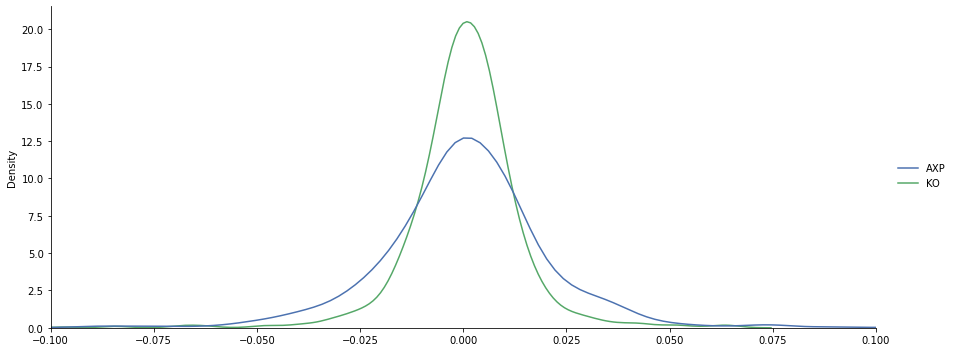

In [ ]:
sns.displot(data=daily_returns[['AXP', 'KO']], kind = 'kde', aspect = 2.5)
plt.xlim(-0.1, 0.1)

In [ ]:
def plot_cum_returns(data, title):
    daily_cum_returns = 1 + data.dropna().pct_change()
    daily_cum_returns = daily_cum_returns.cumprod()*100
    fig = px.line(daily_cum_returns, title=title)
    return fig

fig_cum_returns = plot_cum_returns(df, 'Cumulative Returns of Individual Stocks Starting with $100')
fig_cum_returns.show()

In [ ]:
corr_df = df.corr().round(2) # round to 2 decimal places
fig_corr = px.imshow(corr_df, text_auto=True, title = 'Correlation between Stocks')
fig_corr.show()

In [ ]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

NotImplementedError: ignored

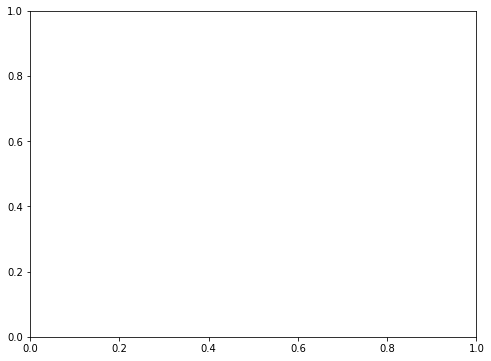

In [ ]:
def plot_efficient_frontier_and_max_sharpe(mu, S):
    # Optimize portfolio for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)

    fig, ax = plt.subplots(figsize=(8,6))
    ef_max_sharpe = copy.deepcopy(ef)
    plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

    # Find the max sharpe portfolio
    ef_max_sharpe.max_sharpe(risk_free_rate=0.02)
    ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
    ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

    # Generate random portfolios
    n_samples = 1000
    w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
    rets = w.dot(ef.expected_returns)
    stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
    sharpes = rets / stds
    ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

    # Output
    ax.set_title("Efficient Frontier with Random Portfolios")
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_efficient_frontier_and_max_sharpe(mu, S)

In [ ]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe(risk_free_rate=0.02)
weights = ef.clean_weights()
print(weights)

In [ ]:
weights_df = pd.DataFrame.from_dict(weights, orient = 'index')
weights_df.columns = ['weights']
weights_df